In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from pycountry_convert import *
import pycountry_convert as py

jobs= pd.read_csv("C:fake_job_postings.csv")

jobs.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [2]:
jobs.shape

(17880, 18)

In [3]:
print("No. of job post is :" +" "+ str(len(jobs.index)))

No. of job post is : 17880


## ANALYZING  

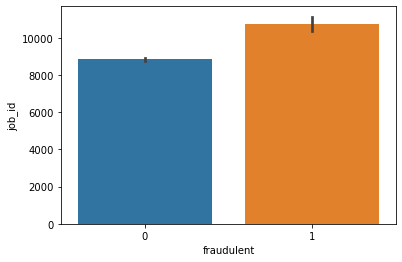

In [4]:
sns.barplot(x="fraudulent",y="job_id",data=jobs)

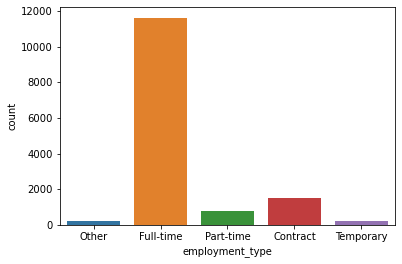

In [5]:
sns.countplot(x='employment_type',data=jobs)

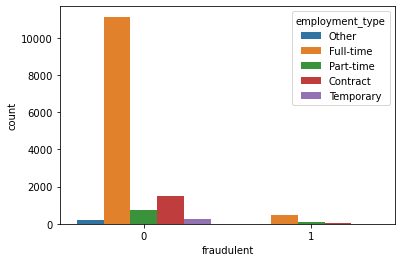

In [6]:
sns.countplot(x='fraudulent',hue='employment_type',data=jobs)

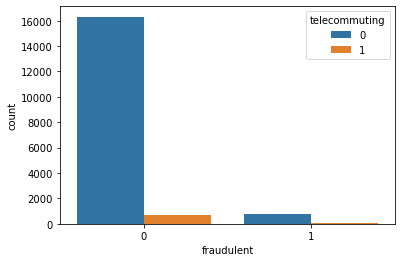

In [7]:
sns.countplot(x='fraudulent',hue='telecommuting',data=jobs)

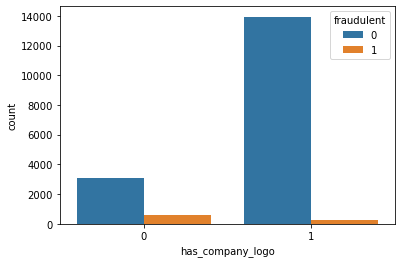

In [8]:
sns.countplot(x='has_company_logo',hue='fraudulent',data=jobs)

# Data Wrangling

In [9]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [10]:
jobs.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [11]:
jobs["salary_range"].fillna("0",inplace= True)
jobs["department"].fillna("Not mentioned",inplace= True)
jobs['company_profile'].fillna("Not Mentioned",inplace= True)
jobs['description'].fillna("Not Mentioned",inplace= True)
jobs['requirements'].fillna("Not Mentioned",inplace= True)
jobs['benefits'].fillna("Not Mentioned",inplace= True)
jobs['employment_type'].fillna("Other",inplace= True)
jobs['required_experience'].fillna("Not Applicable",inplace= True)
jobs['required_education'].fillna("Unspecified",inplace= True)
jobs['industry'].fillna("Not Mentioned",inplace= True)
jobs['function'].fillna("Other",inplace= True)

In [12]:
salary_range = jobs['salary_range'].tolist()

In [13]:
jobs["salary_range"].isnull().sum()

0

In [14]:
salary_range

['0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '20000-28000',
 '0',
 '0',
 '0',
 '100000-120000',
 '0',
 '0',
 '0',
 '0',
 '120000-150000',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '100000-120000',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '50000-65000',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '40000-50000',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '60-80',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '65000-70000',
 '75-115',
 '0',
 '75000-110000',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '17000-20000',
 '16000-28000',
 '0',
 '0',
 '0',
 '0',
 '0',
 '95000-115000',
 '0',
 '0',
 '0',
 '15000-18000',
 '0',
 '0',
 '0',
 '0',
 '50000-70000',
 '0',
 '0',
 '0',
 '0',
 '0',
 '45000-60000',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '30000-40000',
 '0',
 '70000-90000',
 '0',
 '0',
 

In [15]:
def split(salary_range):
    months=["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]
    l=salary_range('-')
    if l[0] and l[1] not in months:
        total=l[0]+l[1]
        return total
    

In [16]:
import re

In [17]:
min_salaries = []
max_salaries = []
for item in salary_range:
    item = str(item)
    
    regex = r"(?i)(jan|feb|mar|apr|may|jun|jul|aug|sep|oct|nov|dec)"
    match = re.search(regex, item)
    
    if match is not None:
        min_salaries.append(0)
        max_salaries.append(0)
        print(match.group(0))
        continue
    
    if "-" in item: 
        salaries = item.split("-")

        min_salaries.append(int(salaries[0]))
        max_salaries.append(int(salaries[1]))
    else:
        min_salaries.append(int(item))
        max_salaries.append(int(item))

Dec
Apr
Apr
Oct
Sep
Jun
Oct
Oct
Jun
Oct
Nov
Nov
Oct
Nov
Oct
Nov
Dec
Apr
Nov
Oct
Nov
Jun
Oct
Oct
Nov
Dec


In [18]:
jobs['R1']=min_salaries
jobs['R2']=max_salaries

In [19]:
jobs['R1']

0        0
1        0
2        0
3        0
4        0
        ..
17875    0
17876    0
17877    0
17878    0
17879    0
Name: R1, Length: 17880, dtype: int64

In [20]:
sorted(jobs['R2'].unique())

[0,
 1,
 15,
 17,
 19,
 20,
 22,
 25,
 28,
 30,
 31,
 35,
 40,
 45,
 48,
 50,
 53,
 55,
 60,
 65,
 67,
 70,
 72,
 75,
 80,
 85,
 90,
 95,
 100,
 105,
 110,
 115,
 120,
 125,
 140,
 150,
 160,
 165,
 175,
 200,
 225,
 230,
 250,
 268,
 500,
 750,
 900,
 956,
 962,
 1000,
 1050,
 1100,
 1150,
 1161,
 1200,
 1400,
 1500,
 1517,
 1600,
 1700,
 2000,
 2500,
 2800,
 3000,
 3075,
 3500,
 3800,
 4000,
 4500,
 5000,
 5500,
 6000,
 7000,
 8000,
 9000,
 10000,
 10500,
 10800,
 11000,
 12000,
 12345,
 12500,
 13000,
 13200,
 14000,
 14400,
 15000,
 15600,
 15750,
 16000,
 16074,
 16500,
 17000,
 17500,
 17680,
 18000,
 18500,
 18720,
 19000,
 19200,
 19600,
 19760,
 20000,
 20800,
 21000,
 21840,
 22000,
 22400,
 22800,
 22880,
 23000,
 24000,
 25000,
 26000,
 27000,
 27040,
 27600,
 28000,
 28800,
 29000,
 30000,
 30160,
 31000,
 31200,
 32000,
 33000,
 33600,
 34000,
 34280,
 34300,
 35000,
 36000,
 37000,
 37400,
 37440,
 37500,
 37566,
 38000,
 39000,
 40000,
 40700,
 41000,
 41600,
 42000,
 4

In [21]:
len(salary_range)

17880

In [22]:
len(min_salaries)

17880

In [23]:
len(max_salaries)

17880

In [24]:
len(jobs['location'])

17880

In [25]:
jobs["location"].fillna("unknown",inplace= True)
loc=jobs['location']
country=[]
for item in loc:
    item=str(item)
    if "," in item:
        list_= item.split(",")
    country.append(list_[0])

In [26]:
jobs["location"]=country
len(country)

17880

In [27]:
jobs.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,R1,R2
0,1,Marketing Intern,US,Marketing,0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Not Mentioned,0,1,0,Other,Internship,Unspecified,Not Mentioned,Marketing,0,0,0
1,2,Customer Service - Cloud Video Production,NZ,Success,0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Unspecified,Marketing and Advertising,Customer Service,0,0,0
2,3,Commissioning Machinery Assistant (CMA),US,Not mentioned,0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Not Mentioned,0,1,0,Other,Not Applicable,Unspecified,Not Mentioned,Other,0,0,0
3,4,Account Executive - Washington DC,US,Sales,0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,0,0
4,5,Bill Review Manager,US,Not mentioned,0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,0,0


In [28]:
jobs.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
R1                     0
R2                     0
dtype: int64

In [29]:
jobs['required_education'].unique()

array(['Unspecified', "Bachelor's Degree", "Master's Degree",
       'High School or equivalent', 'Some College Coursework Completed',
       'Vocational', 'Certification', 'Associate Degree', 'Professional',
       'Doctorate', 'Some High School Coursework', 'Vocational - Degree',
       'Vocational - HS Diploma'], dtype=object)

In [30]:
jobs['required_experience'].unique()

array(['Internship', 'Not Applicable', 'Mid-Senior level', 'Associate',
       'Entry level', 'Executive', 'Director'], dtype=object)

In [31]:
jobs['function'].unique()

array(['Marketing', 'Customer Service', 'Other', 'Sales',
       'Health Care Provider', 'Management', 'Information Technology',
       'Engineering', 'Administrative', 'Design', 'Production',
       'Education', 'Supply Chain', 'Business Development',
       'Product Management', 'Financial Analyst', 'Consulting',
       'Human Resources', 'Project Management', 'Manufacturing',
       'Public Relations', 'Strategy/Planning', 'Advertising', 'Finance',
       'General Business', 'Research', 'Accounting/Auditing',
       'Art/Creative', 'Quality Assurance', 'Data Analyst',
       'Business Analyst', 'Writing/Editing', 'Distribution', 'Science',
       'Training', 'Purchasing', 'Legal'], dtype=object)

In [32]:
jobs['department'].unique()

array(['Marketing', 'Success', 'Not mentioned', ..., 'Admin - Clerical',
       'Administrative Dept', 'Hospitality'], dtype=object)

In [33]:
tup=jobs['industry'].unique()
sorted(tup,reverse= False)

['Accounting',
 'Airlines/Aviation',
 'Alternative Dispute Resolution',
 'Animation',
 'Apparel & Fashion',
 'Architecture & Planning',
 'Automotive',
 'Aviation & Aerospace',
 'Banking',
 'Biotechnology',
 'Broadcast Media',
 'Building Materials',
 'Business Supplies and Equipment',
 'Capital Markets',
 'Chemicals',
 'Civic & Social Organization',
 'Civil Engineering',
 'Commercial Real Estate',
 'Computer & Network Security',
 'Computer Games',
 'Computer Hardware',
 'Computer Networking',
 'Computer Software',
 'Construction',
 'Consumer Electronics',
 'Consumer Goods',
 'Consumer Services',
 'Cosmetics',
 'Defense & Space',
 'Design',
 'E-Learning',
 'Education Management',
 'Electrical/Electronic Manufacturing',
 'Entertainment',
 'Environmental Services',
 'Events Services',
 'Executive Office',
 'Facilities Services',
 'Farming',
 'Financial Services',
 'Fishery',
 'Food & Beverages',
 'Food Production',
 'Fund-Raising',
 'Furniture',
 'Gambling & Casinos',
 'Government Administ

In [34]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17880 non-null  object
 3   department           17880 non-null  object
 4   salary_range         17880 non-null  object
 5   company_profile      17880 non-null  object
 6   description          17880 non-null  object
 7   requirements         17880 non-null  object
 8   benefits             17880 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      17880 non-null  object
 13  required_experience  17880 non-null  object
 14  required_education   17880 non-null  object
 15  industry             17880 non-null  object
 16  func

In [35]:
jobs['location'].unique()

array(['US', 'NZ', 'DE', 'GB', 'AU', 'SG', 'IL', 'AE', 'CA', 'IN', 'EG',
       'PL', 'GR', 'PK', 'BE', 'BR', 'SA', 'DK', 'RU', 'ZA', 'CY', 'HK',
       'TR', 'IE', 'LT', 'JP', 'NL', 'AT', 'KR', 'FR', 'EE', 'TH', 'PA',
       'KE', 'MU', 'MX', 'RO', 'MY', 'FI', 'CN', 'ES', 'SE', 'CL', 'UA',
       'QA', 'IT', 'LV', 'IQ', 'BG', 'PH', 'CZ', 'VI', 'MT', 'HU', 'BD',
       'KW', 'LU', 'NG', 'RS', 'BY', 'VN', 'ID', 'ZM', 'NO', 'BH', 'UG',
       'CH', 'TT', 'SD', 'SK', 'AR', 'TW', 'PT', 'PE', 'CO', 'IS', 'SI',
       'MA', 'AM', 'TN', 'GH', 'AL', 'HR', 'CM', 'SV', 'NI', 'LK', 'JM',
       'KZ', 'KH'], dtype=object)

In [36]:
jobs['employment_type'].unique()

array(['Other', 'Full-time', 'Part-time', 'Contract', 'Temporary'],
      dtype=object)

In [37]:
jobs.head(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,R1,R2
0,1,Marketing Intern,US,Marketing,0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Not Mentioned,0,1,0,Other,Internship,Unspecified,Not Mentioned,Marketing,0,0,0
1,2,Customer Service - Cloud Video Production,NZ,Success,0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Unspecified,Marketing and Advertising,Customer Service,0,0,0
2,3,Commissioning Machinery Assistant (CMA),US,Not mentioned,0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Not Mentioned,0,1,0,Other,Not Applicable,Unspecified,Not Mentioned,Other,0,0,0
3,4,Account Executive - Washington DC,US,Sales,0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,0,0
4,5,Bill Review Manager,US,Not mentioned,0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,0,0
5,6,Accounting Clerk,US,Not mentioned,0,Not Mentioned,Job OverviewApex is an environmental consultin...,Not Mentioned,Not Mentioned,0,0,0,Other,Not Applicable,Unspecified,Not Mentioned,Other,0,0,0
6,7,Head of Content (m/f),DE,ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0,20000,28000
7,8,Lead Guest Service Specialist,US,Not mentioned,0,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,Other,Not Applicable,Unspecified,Not Mentioned,Other,0,0,0
8,9,HP BSM SME,US,Not mentioned,0,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,Not Mentioned,0,1,1,Full-time,Associate,Unspecified,Information Technology and Services,Other,0,0,0
9,10,Customer Service Associate - Part Time,US,Not mentioned,0,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,Not Mentioned,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0,0,0


In [38]:
whole= jobs['R1']+jobs['R2']

In [39]:
len(whole)

17880

In [40]:
max(whole)

2000000000

In [41]:
min(whole)

0

In [42]:
approx_salary= whole/2

In [43]:
max(approx_salary)

1000000000.0

In [44]:
approx_salary

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
17875    0.0
17876    0.0
17877    0.0
17878    0.0
17879    0.0
Length: 17880, dtype: float64

In [45]:
sorted(approx_salary,reverse= False)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [46]:
len(approx_salary)/2

8940.0

In [47]:
jobs['approx_salary']=approx_salary

In [48]:
jobs['approx_salary'].describe()

count    1.788000e+04
mean     1.055188e+05
std      8.920370e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+09
Name: approx_salary, dtype: float64

In [49]:
jobs.head(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,R1,R2,approx_salary
0,1,Marketing Intern,US,Marketing,0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Not Mentioned,0,...,0,Other,Internship,Unspecified,Not Mentioned,Marketing,0,0,0,0.0
1,2,Customer Service - Cloud Video Production,NZ,Success,0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,0,Full-time,Not Applicable,Unspecified,Marketing and Advertising,Customer Service,0,0,0,0.0
2,3,Commissioning Machinery Assistant (CMA),US,Not mentioned,0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Not Mentioned,0,...,0,Other,Not Applicable,Unspecified,Not Mentioned,Other,0,0,0,0.0
3,4,Account Executive - Washington DC,US,Sales,0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,0,0,0.0
4,5,Bill Review Manager,US,Not mentioned,0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,0,0,0.0
5,6,Accounting Clerk,US,Not mentioned,0,Not Mentioned,Job OverviewApex is an environmental consultin...,Not Mentioned,Not Mentioned,0,...,0,Other,Not Applicable,Unspecified,Not Mentioned,Other,0,0,0,0.0
6,7,Head of Content (m/f),DE,ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,...,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0,20000,28000,24000.0
7,8,Lead Guest Service Specialist,US,Not mentioned,0,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,...,1,Other,Not Applicable,Unspecified,Not Mentioned,Other,0,0,0,0.0
8,9,HP BSM SME,US,Not mentioned,0,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,Not Mentioned,0,...,1,Full-time,Associate,Unspecified,Information Technology and Services,Other,0,0,0,0.0
9,10,Customer Service Associate - Part Time,US,Not mentioned,0,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,Not Mentioned,0,...,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0,0,0,0.0


In [50]:
x=jobs['approx_salary']

In [51]:
n=(x-min(x))/(max(x)-min(x))

In [52]:
n

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
17875    0.0
17876    0.0
17877    0.0
17878    0.0
17879    0.0
Name: approx_salary, Length: 17880, dtype: float64

In [53]:
len(n)

17880

In [54]:
max(n)

1.0

In [55]:
min(n)

0.0

In [56]:
n.mean()

0.0001055187615212535

In [57]:
sorted(n.unique(),reverse= False)

[0.0,
 5e-10,
 1.4e-08,
 1.45e-08,
 1.6e-08,
 1.65e-08,
 1.7e-08,
 1.8e-08,
 1.85e-08,
 2e-08,
 2.1e-08,
 2.25e-08,
 2.45e-08,
 2.5e-08,
 2.6e-08,
 2.65e-08,
 2.75e-08,
 2.85e-08,
 3e-08,
 3.25e-08,
 3.35e-08,
 3.5e-08,
 3.75e-08,
 4e-08,
 4.5e-08,
 4.65e-08,
 4.75e-08,
 5e-08,
 5.15e-08,
 5.4e-08,
 5.5e-08,
 5.6e-08,
 5.75e-08,
 6e-08,
 6.1e-08,
 6.25e-08,
 6.35e-08,
 6.5e-08,
 6.75e-08,
 7e-08,
 7.25e-08,
 7.5e-08,
 8e-08,
 8.25e-08,
 8.5e-08,
 8.75e-08,
 9e-08,
 9.5e-08,
 1e-07,
 1.05e-07,
 1.075e-07,
 1.1e-07,
 1.125e-07,
 1.15e-07,
 1.175e-07,
 1.2e-07,
 1.25e-07,
 1.34e-07,
 1.4e-07,
 1.5e-07,
 1.625e-07,
 2e-07,
 2.15e-07,
 2.25e-07,
 4.75e-07,
 5e-07,
 5.125e-07,
 7.5e-07,
 9e-07,
 9.25e-07,
 9.5e-07,
 9.56e-07,
 9.62e-07,
 1e-06,
 1.05e-06,
 1.075e-06,
 1.15e-06,
 1.161e-06,
 1.2e-06,
 1.25e-06,
 1.3e-06,
 1.4e-06,
 1.5e-06,
 1.517e-06,
 1.5475e-06,
 1.6e-06,
 1.65e-06,
 1.96e-06,
 2e-06,
 2.1e-06,
 2.25e-06,
 2.5e-06,
 2.65e-06,
 3e-06,
 3.15e-06,
 3.5e-06,
 3.75e-06,
 4e-06,

In [58]:
len(n)

17880

In [59]:
max(n)

1.0

In [60]:
min(n)

0.0

In [61]:
f=n.unique()

In [62]:
q4=np.quantile(f,1)
q3=np.quantile(f,(3/4))
q2=np.quantile(f,(1/2))
q1=np.quantile(f,(1/4))
group=[]
for i in n:
    if i>=0 and i<q1:
        group.append(4)
    elif i>=q1 and i<q2:
        group.append(3)
    elif i>=q2 and i<q3:
        group.append(2)
    elif i>=q3 and i<=q4:
        group.append(1)
        

In [63]:
q1,q2,q3,q4

(6.065125e-06, 3.5175e-05, 0.00011075000000000001, 1.0)

In [64]:
len(group)

17880

In [65]:
max(group)

4

In [66]:
min(group)

1

In [67]:
jobs['Salary_rank']= group

In [68]:
jobs.head(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,employment_type,required_experience,required_education,industry,function,fraudulent,R1,R2,approx_salary,Salary_rank
0,1,Marketing Intern,US,Marketing,0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Not Mentioned,0,...,Other,Internship,Unspecified,Not Mentioned,Marketing,0,0,0,0.0,4
1,2,Customer Service - Cloud Video Production,NZ,Success,0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,Full-time,Not Applicable,Unspecified,Marketing and Advertising,Customer Service,0,0,0,0.0,4
2,3,Commissioning Machinery Assistant (CMA),US,Not mentioned,0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Not Mentioned,0,...,Other,Not Applicable,Unspecified,Not Mentioned,Other,0,0,0,0.0,4
3,4,Account Executive - Washington DC,US,Sales,0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,0,0,0.0,4
4,5,Bill Review Manager,US,Not mentioned,0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,0,0,0.0,4
5,6,Accounting Clerk,US,Not mentioned,0,Not Mentioned,Job OverviewApex is an environmental consultin...,Not Mentioned,Not Mentioned,0,...,Other,Not Applicable,Unspecified,Not Mentioned,Other,0,0,0,0.0,4
6,7,Head of Content (m/f),DE,ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,...,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0,20000,28000,24000.0,3
7,8,Lead Guest Service Specialist,US,Not mentioned,0,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,...,Other,Not Applicable,Unspecified,Not Mentioned,Other,0,0,0,0.0,4
8,9,HP BSM SME,US,Not mentioned,0,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,Not Mentioned,0,...,Full-time,Associate,Unspecified,Information Technology and Services,Other,0,0,0,0.0,4
9,10,Customer Service Associate - Part Time,US,Not mentioned,0,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,Not Mentioned,0,...,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0,0,0,0.0,4


In [69]:
jobs['Salary_rank']

0        4
1        4
2        4
3        4
4        4
        ..
17875    4
17876    4
17877    4
17878    4
17879    4
Name: Salary_rank, Length: 17880, dtype: int64

In [70]:
jobs['location'].unique()

array(['US', 'NZ', 'DE', 'GB', 'AU', 'SG', 'IL', 'AE', 'CA', 'IN', 'EG',
       'PL', 'GR', 'PK', 'BE', 'BR', 'SA', 'DK', 'RU', 'ZA', 'CY', 'HK',
       'TR', 'IE', 'LT', 'JP', 'NL', 'AT', 'KR', 'FR', 'EE', 'TH', 'PA',
       'KE', 'MU', 'MX', 'RO', 'MY', 'FI', 'CN', 'ES', 'SE', 'CL', 'UA',
       'QA', 'IT', 'LV', 'IQ', 'BG', 'PH', 'CZ', 'VI', 'MT', 'HU', 'BD',
       'KW', 'LU', 'NG', 'RS', 'BY', 'VN', 'ID', 'ZM', 'NO', 'BH', 'UG',
       'CH', 'TT', 'SD', 'SK', 'AR', 'TW', 'PT', 'PE', 'CO', 'IS', 'SI',
       'MA', 'AM', 'TN', 'GH', 'AL', 'HR', 'CM', 'SV', 'NI', 'LK', 'JM',
       'KZ', 'KH'], dtype=object)

In [71]:
country_alpha2 = jobs['location'].astype(str)
name=[]
for i in country_alpha2:
    continent_code = py.country_alpha2_to_continent_code(i)
    name.append(continent_code)


In [72]:
q=np.array(name)

In [73]:
np.unique(q)

array(['AF', 'AS', 'EU', 'NA', 'OC', 'SA'], dtype='<U2')

In [74]:
len(name)

17880

In [75]:
category=[]
for i in name:
    if i == 'NA'or i== 'SA':
        category.append("AME")
    elif i != 'NA' and i!='SA':
        category.append(i)
        

In [76]:
p=np.unique(category)

In [77]:
p

array(['AF', 'AME', 'AS', 'EU', 'OC'], dtype='<U3')

In [78]:
jobs['location']= category

In [79]:
jobs.head(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,employment_type,required_experience,required_education,industry,function,fraudulent,R1,R2,approx_salary,Salary_rank
0,1,Marketing Intern,AME,Marketing,0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Not Mentioned,0,...,Other,Internship,Unspecified,Not Mentioned,Marketing,0,0,0,0.0,4
1,2,Customer Service - Cloud Video Production,OC,Success,0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,Full-time,Not Applicable,Unspecified,Marketing and Advertising,Customer Service,0,0,0,0.0,4
2,3,Commissioning Machinery Assistant (CMA),AME,Not mentioned,0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Not Mentioned,0,...,Other,Not Applicable,Unspecified,Not Mentioned,Other,0,0,0,0.0,4
3,4,Account Executive - Washington DC,AME,Sales,0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,0,0,0.0,4
4,5,Bill Review Manager,AME,Not mentioned,0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,0,0,0.0,4
5,6,Accounting Clerk,AME,Not mentioned,0,Not Mentioned,Job OverviewApex is an environmental consultin...,Not Mentioned,Not Mentioned,0,...,Other,Not Applicable,Unspecified,Not Mentioned,Other,0,0,0,0.0,4
6,7,Head of Content (m/f),EU,ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,...,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0,20000,28000,24000.0,3
7,8,Lead Guest Service Specialist,AME,Not mentioned,0,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,...,Other,Not Applicable,Unspecified,Not Mentioned,Other,0,0,0,0.0,4
8,9,HP BSM SME,AME,Not mentioned,0,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,Not Mentioned,0,...,Full-time,Associate,Unspecified,Information Technology and Services,Other,0,0,0,0.0,4
9,10,Customer Service Associate - Part Time,AME,Not mentioned,0,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,Not Mentioned,0,...,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0,0,0,0.0,4


In [80]:
jobs.drop(['salary_range','company_profile','description','required_experience','required_education','requirements','benefits','department','has_company_logo','has_questions','industry','function','R1','R2','approx_salary'], axis=1, inplace=True)

In [81]:
jobs.head(5)

,job_id,title,location,telecommuting,employment_type,fraudulent,Salary_rank
0,1,Marketing Intern,AME,0,Other,0,4
1,2,Customer Service - Cloud Video Production,OC,0,Full-time,0,4
2,3,Commissioning Machinery Assistant (CMA),AME,0,Other,0,4
3,4,Account Executive - Washington DC,AME,0,Full-time,0,4
4,5,Bill Review Manager,AME,0,Full-time,0,4


In [82]:
join=[]
for i in jobs['telecommuting']:
    if i ==0:
        join.append("NO")
    elif i== 1:
        join.append("YES")           

In [83]:
jobs['telecommuting']= join

In [84]:
jobs.head(3)

,job_id,title,location,telecommuting,employment_type,fraudulent,Salary_rank
0,1,Marketing Intern,AME,NO,Other,0,4
1,2,Customer Service - Cloud Video Production,OC,NO,Full-time,0,4
2,3,Commissioning Machinery Assistant (CMA),AME,NO,Other,0,4


In [85]:
communication= pd.get_dummies(jobs['telecommuting'],drop_first= True)
communication.head(10)

,YES
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [86]:
# s_rank= pd.get_dummies(jobs['Salary_rank'], drop_first = True)
# s_rank.head(10)

In [87]:
jobs= pd.concat([jobs,communication],axis=1)

In [88]:
jobs.head(2)

,job_id,title,location,telecommuting,employment_type,fraudulent,Salary_rank,YES
0,1,Marketing Intern,AME,NO,Other,0,4,0
1,2,Customer Service - Cloud Video Production,OC,NO,Full-time,0,4,0


In [89]:
jobs.drop(['telecommuting','title'], axis=1, inplace= True)

In [90]:
jobs.head(2)

,job_id,location,employment_type,fraudulent,Salary_rank,YES
0,1,AME,Other,0,4,0
1,2,OC,Full-time,0,4,0


In [91]:
location= communication= pd.get_dummies(jobs['location'],drop_first= True)
location.head(3)

,AME,AS,EU,OC
0,1,0,0,0
1,0,0,0,1
2,1,0,0,0


In [92]:
jobs.drop(['employment_type'], axis=1, inplace= True)

In [93]:
jobs= pd.concat([jobs,location], axis=1)
jobs.head(5)

,job_id,location,fraudulent,Salary_rank,YES,AME,AS,EU,OC
0,1,AME,0,4,0,1,0,0,0
1,2,OC,0,4,0,0,0,0,1
2,3,AME,0,4,0,1,0,0,0
3,4,AME,0,4,0,1,0,0,0
4,5,AME,0,4,0,1,0,0,0


In [94]:
jobs.drop(['location'], axis=1, inplace= True)

In [95]:
jobs.head(3)

,job_id,fraudulent,Salary_rank,YES,AME,AS,EU,OC
0,1,0,4,0,1,0,0,0
1,2,0,4,0,0,0,0,1
2,3,0,4,0,1,0,0,0


# TRAIN DATA

In [96]:
X= jobs.drop('fraudulent', axis=1)
Y= jobs['fraudulent']

In [97]:
X

,job_id,Salary_rank,YES,AME,AS,EU,OC
0,1,4,0,1,0,0,0
1,2,4,0,0,0,0,1
2,3,4,0,1,0,0,0
3,4,4,0,1,0,0,0
4,5,4,0,1,0,0,0
...,...,...,...,...,...,...,...
17875,17876,4,0,1,0,0,0
17876,17877,4,0,1,0,0,0
17877,17878,4,0,1,0,0,0
17878,17879,4,0,0,0,0,0


In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [100]:
pd.unique(Y_test)

array([0, 1], dtype=int64)

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score

In [117]:
clf = DecisionTreeClassifier()

clf.fit(X_train, Y_train)

pred = clf.predict(X_test)

confusion_matrix(Y_test, pred)

array([[4977,  101],
       [ 135,  151]], dtype=int64)

In [118]:
accuracy = accuracy_score(Y_test, pred)

precision = precision_score(Y_test, pred)

f1 = f1_score(Y_test, pred)

print("ACCURACY:{}\nPRECISION:{}\nF1_SCORE:{}\n".format(accuracy, precision, f1))

ACCURACY:0.9560029828486204
PRECISION:0.5992063492063492
F1_SCORE:0.5613382899628253

